In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
fmnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fmnist
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]
X_train = X_train.reshape([-1, 28, 28, 1])
X_valid = X_valid.reshape([-1, 28, 28, 1])
X_test = X_test.reshape([-1, 28, 28, 1])

In [10]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(500, activation = "relu"))
model.add(tf.keras.layers.Dense(10, activation = "softmax"))

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.001)
model.compile(loss = "sparse_categorical_crossentropy", optimizer = optimizer, metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7024 - loss: 8.0981 - val_accuracy: 0.7962 - val_loss: 0.6172
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8278 - loss: 0.4856 - val_accuracy: 0.8209 - val_loss: 0.5224
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8570 - loss: 0.3944 - val_accuracy: 0.8337 - val_loss: 0.4839
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8733 - loss: 0.3458 - val_accuracy: 0.8408 - val_loss: 0.4605
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8850 - loss: 0.3133 - val_accuracy: 0.8436 - val_loss: 0.4530
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8922 - loss: 0.2901 - val_accuracy: 0.8498 - val_loss: 0.4420
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.2695 - val_accuracy: 0.8510 - val_loss: 0.4440
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9074 - loss: 0.2540 -

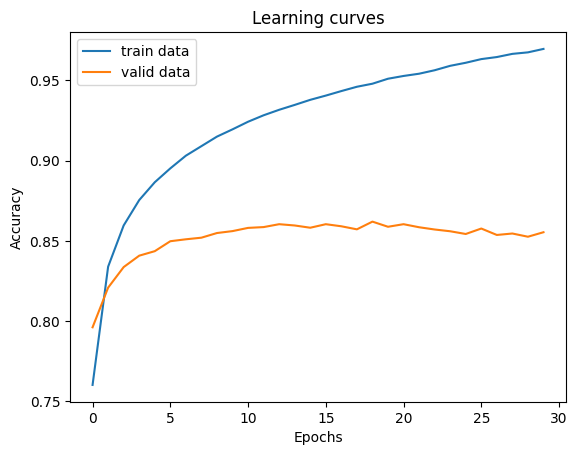

In [11]:
plt.figure()
plt.title("Learning curves")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(history.history["accuracy"], label = "train data")
plt.plot(history.history["val_accuracy"], label = "valid data")
plt.legend()
plt.show()

In [12]:
print("Loss + accuracy on train data: {}".format(model.evaluate(X_train, y_train)))
print("Loss + accuracy on test data: {}".format(model.evaluate(X_test, y_test)))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9285 - loss: 0.1931
Loss + accuracy on train data: [0.1905219554901123, 0.9297199845314026]
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8521 - loss: 0.5966
Loss + accuracy on test data: [0.5830129981040955, 0.8510000109672546]
